### THE "BASIC TWO POINT MODEL"

***
##### WHAT IS IT ?

***
##### ANALYTICAL SOLUTION OF THE "BASIC TWO POINT MODEL"

* The two point model has the following three equations (Equations 5.4 - 5.6 from Peter Stangeby's):

$$ PressureBalance: 2 \, n_t \, T_t = n_u \, T_u $$
$$ PowerBalance: T_u^{7/2} = T_t^{7/2} + \frac{7}{2} \frac{q_{\|}L}{k_{0e}} $$
$$ q_{\|} = \gamma \, k \, n_t \, T_t \, c_{st} $$


* $n_t$ , $T_t$ , $T_u$ are the three unknowns.

* $n_u$ and $q_{\|}$ as specified control parameters, i.e., the independent variables.
* $L$, $\gamma$ and $κ_{0e}$ are specified constants of the problem.

* In the above equation for heat flux $q_{\|}$, the temperature must be provided in Kelvin. However, the plasma temperatures are usually described in $[eV]$.

* Substituting $k \cdot T_t [K] = e \cdot T_t [eV]$, allows us to use temperature in the units of $[eV]$ while keeping the heat flux in $[J/m²s]$:
$$ q_{\|} = \gamma \, e \, n_t \, T_t \, c_{st}$$

* $e=1.6022 \times 10^{-19}$ is the unit charge of electrons.

* Acoustic speed at target:
$$ c_{st} = \sqrt{\frac{2 \, T_t}{m_i}} $$

* Squaring the third equation above, substituting for $c_{st}$ and simplifying:
$$ q_{\|}^2 = (\gamma \, e \, n_t \, T_t \, c_{st})^2 $$
$$ q_{\|}^2 = (\gamma \, e \, n_t \, T_t)^2 \, (c_{st})^2 $$
$$ q_{\|}^2 = (\gamma \, e \, n_t \, T_t)^2 \, \left(\frac{2 \, T_t}{m_i}\right)$$

* Substituting the first equation in the above equation:
$$ q_{\|}^2 = \left(\gamma \, e \, \frac{n_u \, T_u}{2}\right)^2 \, \left(\frac{2 \, T_t}{m_i}\right)$$

* Rearranging the above equation for the target temperature:
$$ T_t = \frac{m_i}{2} \left(\frac{2 \, q_{\|}}{\gamma \, e \, n_u \, T_u}\right)^2 $$


* So we end up with two implicit nonlinear functions for upstream and target temperatures:
$$ T_u^{7/2} = T_t^{7/2} + \frac{7}{2} \frac{q_{\|}L}{k_{0e}} $$
$$ T_t = \frac{m_i}{2} \left(\frac{2 \, q_{\|}}{\gamma \, e \, n_u \, T_u}\right)^2 $$

***
##### How is it solved ?

* An iterative solution is required to obtain the upstream and target temperatures.

* **Step 1:** $T_t$ is assumed to be $0$. Thus, the predicted upstream temperature is,
$$ T_u^{7/2} \simeq \frac{7}{2} \frac{q_{\|} \, L}{k_{0e}} $$
$$ T_u \simeq \left(\frac{7}{2} \frac{q_{\|} \, L}{k_{0e}}\right)^{2/7} $$

* **Step 2:** The predicted $T_u$ is plugged in to the $T_t$ equation.
$$ T_t = \frac{m_i}{2} \left(\frac{2 \, q_{\|}}{\gamma \, e \, n_u \, T_u}\right)^2 $$

* **Step 3:** With the obtained $T_t$ value, the $T_u$ is corrected
$$ T_u^{7/2} = T_t^{7/2} + \frac{7}{2} \frac{q_{\|}L}{k_{0e}} $$

* **Step 4:** Step 2 and 3 are repeated until convergence is achieved.

* Once we have the values for $T_u$ and $T_t$, we can calculate $n_t$
$$ n_t = \frac{n_u \, T_u}{2 \, T_t} $$

***
##### Temperature profile

* Once the upstream temperature is obtained, the Temperature profile can be calculated using the following equation (Equation 4.85 from Peter Stangeby's)

$$ T(x) = \left[T_u^{7/2} - \frac{7}{2} \frac{q_{\|}}{k_{0e}} \, x\right]^{2/7} $$

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

***
CONSTANTS

In [2]:
# GLOBAL CONSTANTS
c   = 3e+8                      # speed of light [m/s]
e   = 1.6022e-19                # unit charge of electrons

# Simulation configuration
gamma = 7                       # heat transmission coefficient
k0e   = 2000                    # coefficient occuring in plasma heat conduction

L     = 100                     # length of the SOL [m]
m_i   = 2 * 938.272e+6 / (c*c)  # mass of proton [eV/c²]
nu    = 3e19                    # upstream density [1/m³]

***
DEFINE EXPRESSIONS

In [3]:
def calculate_Tu(Tt, q, L):
    """Upstream temperature"""
    return (Tt**(7/2) + (7/2)*(q/k0e)*L)**(2/7)

def calculate_Tt(mi, q, gamma, nu, Tu):
    """Target temperature"""
    return (mi/2) * ((2*q)/(gamma*e*nu*Tu))**2

def calculate_T(Tu, q, x):
    """Temperature as function of distance"""
    return (Tu**(7/2.0) - (7/2.0)*(q/k0e)*x)**(2.0/7)

def calculate_nt(nu, Tu, Tt):
    """Target density"""
    return nu*Tu / (2*Tt)

def calculate_cs(T, mi):
    """acosutic speed"""
    return (2*T/mi)**(1/2)

def calculate_qse(gamma, nt, Tt, mi):
    """sheath heat flux"""
    c_st = calculate_cs(Tt, mi)
    return gamma * e * nt * Tt * c_st

***
FEM vs ANALYTICAL

*** 
##### END TEMPERATURES FOR DIFFERENT HEAT FLUX (q_sol)
**Tu : Upstream plasma temperature**  
**Tt : Target plasma temperature**

| q_sol              | (Tu, Tt) analytical    | (Tu, Tt) FEM      
| :----------------: | ----------------------:| ----------------------:
| 1.00000 x $10^9$   | (341.4508, 315.94958)  | (341.2130, 315.66100) 
| 1.01526 x $10^8$   | (118.0467,  27.24713)  | (118.0420,  27.07170)
| 4.30568 x $10^7$   | ( 92.2367,   8.02693)  | ( 92.2366,   7.96025)     

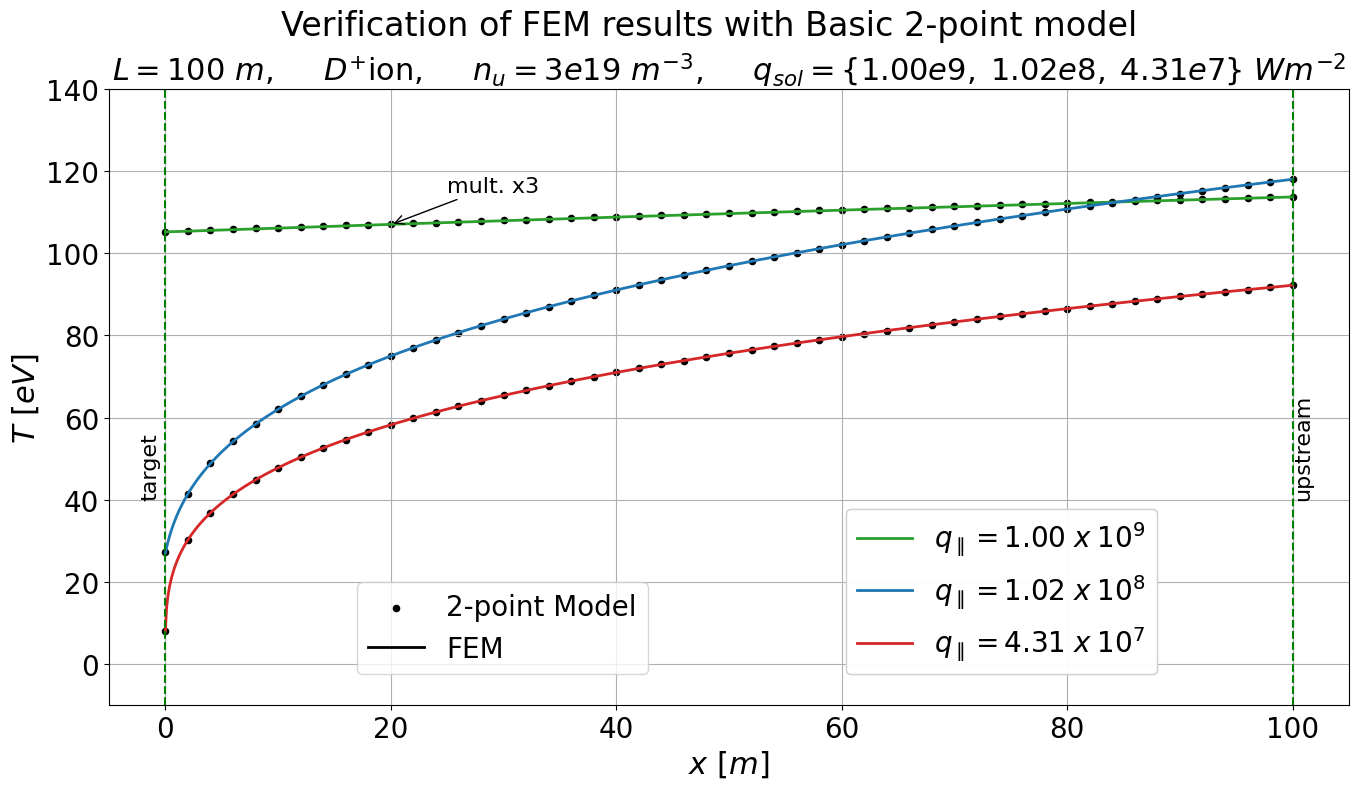

In [4]:
#%matplotlib widget

############################## ANALYTICAL #################################
# initial upstream temperature
Tu = [341.4508, 118.04671801510, 92.2367]

# upstream heat flux entering the SOL [W/m²]
q = [1e9, 1.01526e+08, 4.30568e+07]

n_points = 1001
x = np.linspace(0.0,L, n_points)

# Temperature profile from two-point analytical model
T_2ptM1 = np.asarray([calculate_T(Tu[0], q[0], x_) for x_ in x]) # corresponds to q_sol=1e9
T_2ptM2 = np.asarray([calculate_T(Tu[1], q[1], x_) for x_ in x]) # corresponds to q_sol=1e8
T_2ptM3 = np.asarray([calculate_T(Tu[2], q[2], x_) for x_ in x]) # corresponds to q_sol=1e7


############################## SIMULATION #################################
# Temperature data from FEM
files = [
    "./q1.00e9/T_fem_L100_mi2_Nu3_q1.00e9_onion", 
    "./q1.02e8/T_fem_L100_mi2_Nu3_q1.02e8_onion", 
    "./q4.31e7/T_fem_L100_mi2_Nu3_q4.31e7_onion"
]

df1 = pd.read_csv(os.path.abspath(files[0] +".csv"))
df2 = pd.read_csv(os.path.abspath(files[1] +".csv"))
df3 = pd.read_csv(os.path.abspath(files[2] +".csv"))

x_sim1 = df1.get("arc_length")
x_sim2 = df2.get("arc_length")
x_sim3 = df3.get("arc_length")

# Temperature profile from FEM data
T_sim1 = df1.get("T")
T_sim2 = df2.get("T")
T_sim3 = df3.get("T")


############################## PLOTS #################################
fig, ax = plt.subplots(1, 1, figsize=(16,8))

# T(x) plot
s1 = ax.scatter([],[], color="black", s=20)
s2 = ax.scatter(L-x[::20], T_2ptM1[::20]/3.0, color="black", s=20)
s3 = ax.scatter(L-x[::20], T_2ptM2[::20],     color="black", s=20)
s4 = ax.scatter(L-x[::20], T_2ptM3[::20],     color="black", s=20)

p1, = ax.plot([],[], color="black", linestyle="solid", linewidth=2)
p2, = ax.plot(L-x_sim1, T_sim1/3.0, color="tab:green", linestyle="solid", linewidth=2)
p3, = ax.plot(L-x_sim2, T_sim2,     color="tab:blue",  linestyle="solid", linewidth=2)
p4, = ax.plot(L-x_sim3, T_sim3,     color="tab:red",   linestyle="solid", linewidth=2)

ax.set_title("$L=100 \ m$, $\quad$ $D^{+}$ion, $\quad$ $n_u=3e19 \ m^{-3}$, $\quad$ $q_{sol}=\{1.00e9,\;1.02e8,\;4.31e7\} \ Wm^{-2}$", fontsize=22)
ax.set_ylabel("$T$ $[eV]$",fontsize=22)

# ax.legend(fontsize=20)
legend1 = plt.legend([s1,p1], ["2-point Model", "FEM"], loc=(0.2,0.05), fontsize=20)
legend2 = plt.legend([p2,p3, p4], ["$q_{\parallel}=1.00 \;x\; 10^9$", "$q_{\parallel}=1.02 \;x\; 10^8$", 
                                   "$q_{\parallel}=4.31 \;x\; 10^7$"], loc=(0.594,0.05), fontsize=20)
ax.add_artist(legend1)
ax.add_artist(legend2)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel("$x$ $[m]$", fontsize=22)
ax.grid()

ax.axvline(x=0, linestyle="dashed", color="green")
ax.axvline(x=100, linestyle="dashed", color="green")

ax.annotate("target", xy=(0,40), xytext=(-2.2,41), rotation=90, fontsize=16)
ax.annotate("upstream", xy=(100,40), xytext=(100,41), rotation=90, fontsize=16)
ax.annotate("mult. x3", xy=(20,107), xytext=(25,115), rotation=0, fontsize=16, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.ylim([-10,140])

fig.suptitle("Verification of FEM results with Basic 2-point model", fontsize=24)
fig.savefig("FEMEnergyEquationVerificationWith2ptModel"+".png")
plt.show()

***
                   
**Comparison of Tu, Tt, nt between FEM and 2point model**

| q_sol              | (Tu, Tt, nt/nu) analytical       | (Tu, Tt, nt/nu) FEM      
| :----------------: | --------------------------------:| -------------------------------:
| 1.00000 x $10^9$   | (341.4508, 315.94958,  0.54035)  | (341.2130, 315.66100, 0.54110) 
| 1.01526 x $10^8$   | (118.0467,  27.24713,  2.16622)  | (118.0420,  27.07170, 2.18732)
| 4.30568 x $10^7$   | ( 92.2367,   8.02693,  5.74545)  | ( 92.2366,   7.96025, 5.81782)  

#### For EFTC 2023 Conference (Colored plot)

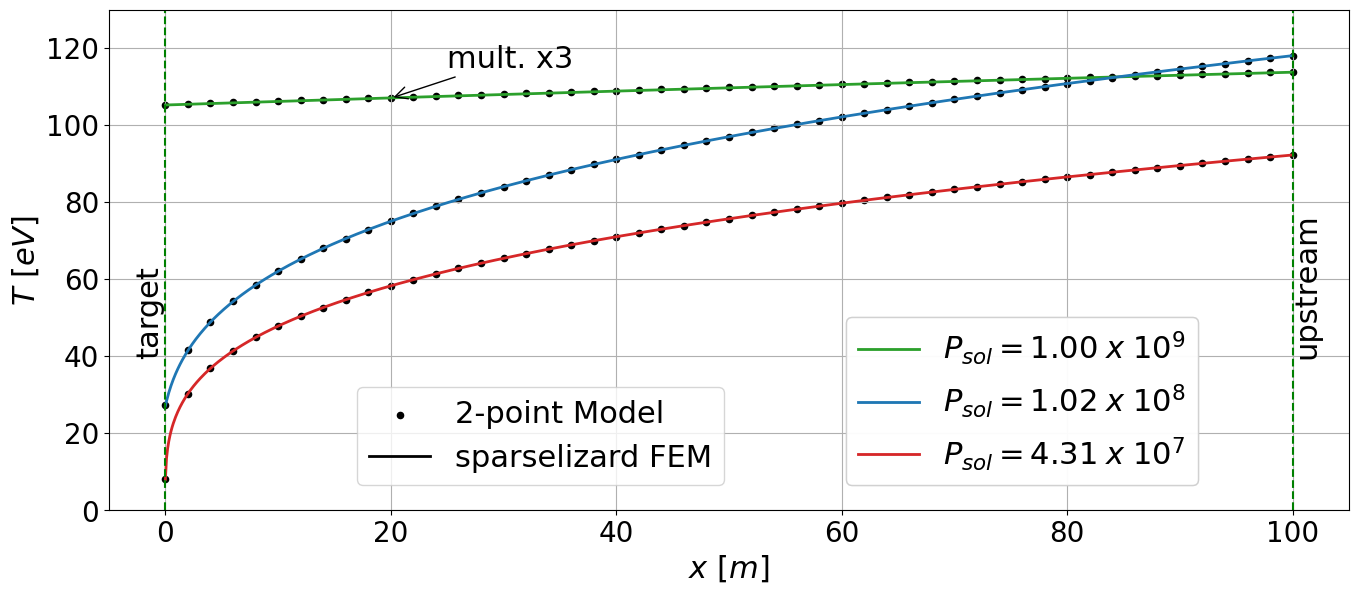

In [5]:
#%matplotlib widget

############################## ANALYTICAL #################################
# initial upstream temperature
Tu = [341.4508, 118.04671801510, 92.2367]

# upstream heat flux entering the SOL [W/m²]
q = [1e9, 1.01526e+08, 4.30568e+07]

n_points = 1001
x = np.linspace(0.0,L, n_points)

# Temperature profile from two-point analytical model
T_2ptM1 = np.asarray([calculate_T(Tu[0], q[0], x_) for x_ in x]) # corresponds to q_sol=1e9
T_2ptM2 = np.asarray([calculate_T(Tu[1], q[1], x_) for x_ in x]) # corresponds to q_sol=1e8
T_2ptM3 = np.asarray([calculate_T(Tu[2], q[2], x_) for x_ in x]) # corresponds to q_sol=1e7


############################## SIMULATION #################################
# Temperature data from FEM
files = [
    "./q1.00e9/T_fem_L100_mi2_Nu3_q1.00e9_onion", 
    "./q1.02e8/T_fem_L100_mi2_Nu3_q1.02e8_onion", 
    "./q4.31e7/T_fem_L100_mi2_Nu3_q4.31e7_onion"
]

df1 = pd.read_csv(os.path.abspath(files[0] +".csv"))
df2 = pd.read_csv(os.path.abspath(files[1] +".csv"))
df3 = pd.read_csv(os.path.abspath(files[2] +".csv"))

x_sim1 = df1.get("arc_length")
x_sim2 = df2.get("arc_length")
x_sim3 = df3.get("arc_length")

# Temperature profile from FEM data
T_sim1 = df1.get("T")
T_sim2 = df2.get("T")
T_sim3 = df3.get("T")


############################## PLOTS #################################
fig, ax = plt.subplots(1, 1, figsize=(16,6.5))

# T(x) plot
s1 = ax.scatter([],[], color="black", s=20)
s2 = ax.scatter(L-x[::20], T_2ptM1[::20]/3.0, color="black", s=20)
s3 = ax.scatter(L-x[::20], T_2ptM2[::20],     color="black", s=20)
s4 = ax.scatter(L-x[::20], T_2ptM3[::20],     color="black", s=20)

p1, = ax.plot([],[], color="black", linestyle="solid", linewidth=2)
p2, = ax.plot(L-x_sim1, T_sim1/3.0, color="tab:green", linestyle="solid", linewidth=2)
p3, = ax.plot(L-x_sim2, T_sim2,     color="tab:blue",  linestyle="solid", linewidth=2)
p4, = ax.plot(L-x_sim3, T_sim3,     color="tab:red",   linestyle="solid", linewidth=2)

#ax.set_title("$D^{+}$ion, $\,$ $L=100 \, m$, $\,$ $n_u=3e19 \ m^{-3}$, $\,$ $P_{sol}=\{1.00e9,\;1.02e8,\;4.31e7\} \ Wm^{-2}$", fontsize=22)
ax.set_ylabel("$T$ $[eV]$",fontsize=22)

# ax.legend(fontsize=20)
legend1 = plt.legend([s1,p1], ["2-point Model", "sparselizard FEM"], loc=(0.2,0.05), fontsize=22)
legend2 = plt.legend([p2,p3, p4], ["$P_{sol}=1.00 \;x\; 10^9$", "$P_{sol}=1.02 \;x\; 10^8$", 
                                   "$P_{sol}=4.31 \;x\; 10^7$"], loc=(0.594,0.05), fontsize=22)
ax.add_artist(legend1)
ax.add_artist(legend2)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel("$x$ $[m]$", fontsize=22)
ax.grid()

ax.axvline(x=0, linestyle="dashed", color="green")
ax.axvline(x=100, linestyle="dashed", color="green")

ax.annotate("target", xy=(0,40), xytext=(-2.7,41), rotation=90, fontsize=22)
ax.annotate("upstream", xy=(100,40), xytext=(100,41), rotation=90, fontsize=22)
ax.annotate("mult. x3", xy=(20,107), xytext=(25,115), rotation=0, fontsize=22, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.ylim([0,130])

fig.savefig("VerificationWith2ptModel_EFTC2023_color"+".png")
fig.savefig("VerificationWith2ptModel_EFTC2023_color"+".svg")
plt.show()

#### For EFTC 2023 Conference (colored, but also works if the abstract is printed in grayscale)

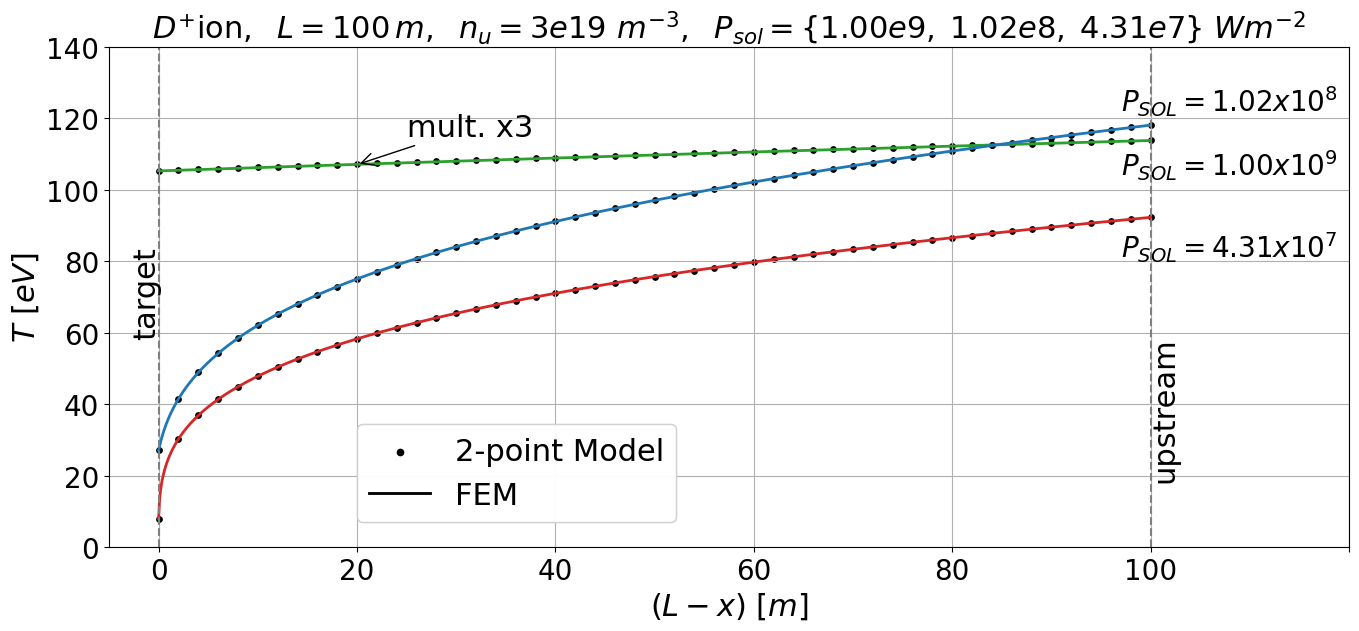

In [10]:
#%matplotlib widget

############################## ANALYTICAL #################################
# initial upstream temperature
Tu = [341.4508, 118.04671801510, 92.2367]

# upstream heat flux entering the SOL [W/m²]
q = [1e9, 1.01526e+08, 4.30568e+07]

n_points = 1001
x = np.linspace(0.0,L, n_points)

# Temperature profile from two-point analytical model
T_2ptM1 = np.asarray([calculate_T(Tu[0], q[0], x_) for x_ in x]) # corresponds to q_sol=1e9
T_2ptM2 = np.asarray([calculate_T(Tu[1], q[1], x_) for x_ in x]) # corresponds to q_sol=1e8
T_2ptM3 = np.asarray([calculate_T(Tu[2], q[2], x_) for x_ in x]) # corresponds to q_sol=1e7


############################## SIMULATION #################################
# Temperature data from FEM
files = [
    "./q1.00e9/T_fem_L100_mi2_Nu3_q1.00e9_onion", 
    "./q1.02e8/T_fem_L100_mi2_Nu3_q1.02e8_onion", 
    "./q4.31e7/T_fem_L100_mi2_Nu3_q4.31e7_onion"
]

df1 = pd.read_csv(os.path.abspath(files[0] +".csv"))
df2 = pd.read_csv(os.path.abspath(files[1] +".csv"))
df3 = pd.read_csv(os.path.abspath(files[2] +".csv"))

x_sim1 = df1.get("arc_length")
x_sim2 = df2.get("arc_length")
x_sim3 = df3.get("arc_length")

# Temperature profile from FEM data
T_sim1 = df1.get("T")
T_sim2 = df2.get("T")
T_sim3 = df3.get("T")


############################## PLOTS #################################
fig, ax = plt.subplots(1, 1, figsize=(16,6.5))

# T(x) plot
s1 = ax.scatter([],[], color="black", s=20)
s2 = ax.scatter(L-x[::20], T_2ptM1[::20]/3.0, color="black", s=15)
s3 = ax.scatter(L-x[::20], T_2ptM2[::20],     color="black", s=15)
s4 = ax.scatter(L-x[::20], T_2ptM3[::20],     color="black", s=15)

p1, = ax.plot([],[], color="black", linestyle="solid", linewidth=2)
p2, = ax.plot(L-x_sim1, T_sim1/3.0, color="tab:green",   linestyle="solid", linewidth=2)
p3, = ax.plot(L-x_sim2, T_sim2,     color="tab:blue",   linestyle="solid", linewidth=2)
p4, = ax.plot(L-x_sim3, T_sim3,     color="tab:red",   linestyle="solid", linewidth=2)

ax.set_title("$D^{+}$ion, $\,$ $L=100 \, m$, $\,$ $n_u=3e19 \ m^{-3}$, $\,$ $P_{sol}=\{1.00e9,\;1.02e8,\;4.31e7\} \ Wm^{-2}$", fontsize=22)
ax.set_ylabel("$T$ $[eV]$",fontsize=22)

# ax.legend(fontsize=20)
legend1 = plt.legend([s1,p1], ["2-point Model", "FEM"], loc=(0.2,0.05), fontsize=22)
ax.add_artist(legend1)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel("$(L-x)$ $[m]$", fontsize=22)
ax.grid()

ax.axvline(x=0, linestyle="dashed", color="grey")
ax.axvline(x=100, linestyle="dashed", color="grey")

ax.annotate("target", xy=(0,60), xytext=(-2.7,60), rotation=90, fontsize=22)
ax.annotate("upstream", xy=(100,20), xytext=(100,20), rotation=90, fontsize=22)
ax.annotate("mult. x3", xy=(20,107), xytext=(25,115), rotation=0, fontsize=22, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax.annotate("$P_{SOL}=1.00x10^9$", xy=(100,105), xytext=(97,104), rotation=0, fontsize=20)
ax.annotate("$P_{SOL}=1.02x10^8$", xy=(100,120), xytext=(97,122), rotation=0, fontsize=20)
ax.annotate("$P_{SOL}=4.31x10^7$", xy=(100, 82), xytext=(97,81), rotation=0, fontsize=20)

plt.ylim([0,140])
plt.xlim([-5,120])
plt.setp(ax.get_xticklabels()[-1], visible=False)

fig.savefig("VerificationWith2ptModel_EFTC2023_grayscale"+".png")
fig.savefig("VerificationWith2ptModel_EFTC2023_grayscale"+".svg")
plt.show()